In [41]:
#fname = "/Users/tabel/Research/codes/pysco/run/1st_tests/examples/boxlen512_n128_lcdmw7v2_00000/output_00004/particles_newton_multigrid_ncoarse7.h5"
def snap_fname(boxlength, output_num):
  f = "/Users/tabel/Research/codes/pysco/run/1st_tests/examples/boxlen"+ str(boxlength) + "_n128_lcdmw7v2_00000/output_"  \
    +str(output_num).zfill(5) + "/particles_newton_multigrid_ncoarse7.h5"
  return f

import numpy as np

def displacement_field_and_initial_coordinates(p, box=[0,1]):
  bmin = box[0]
  bmax = box[1]
  bh = (bmax-bmin)/2
  bl = bmax - bmin
  
  Ndim = np.int64(p.shape[0]**.333333334) # assume we had Ndim**3 particles in a grid on cubic box
  x = bl*(0.5+np.arange(Ndim))/(Ndim)
  xg = np.meshgrid(x,x,x, indexing='ij')
  pl = np.zeros_like(p)
  ds = np.zeros_like(p)
  for i in range(3): # define 
    pl[:,i] = np.ravel(xg[i])
    ds[:,i] = p[:,i] - pl[:,i]
  for i in range(3):
    ds[:,i][ds[:,i] < -bh] += bl
    ds[:,i][ds[:,i] >  bh] -= bl
  return ds, pl # returns displacement field ds and Lagrangian (initial) coordinates


import h5py



import matplotlib.pyplot as plt

fname = snap_fname(2048,9)
with h5py.File(fname, 'r') as h5r:
  p = h5r['position'][:]
  v = h5r['velocity'][:]
  unit_t = h5r.attrs['unit_t']

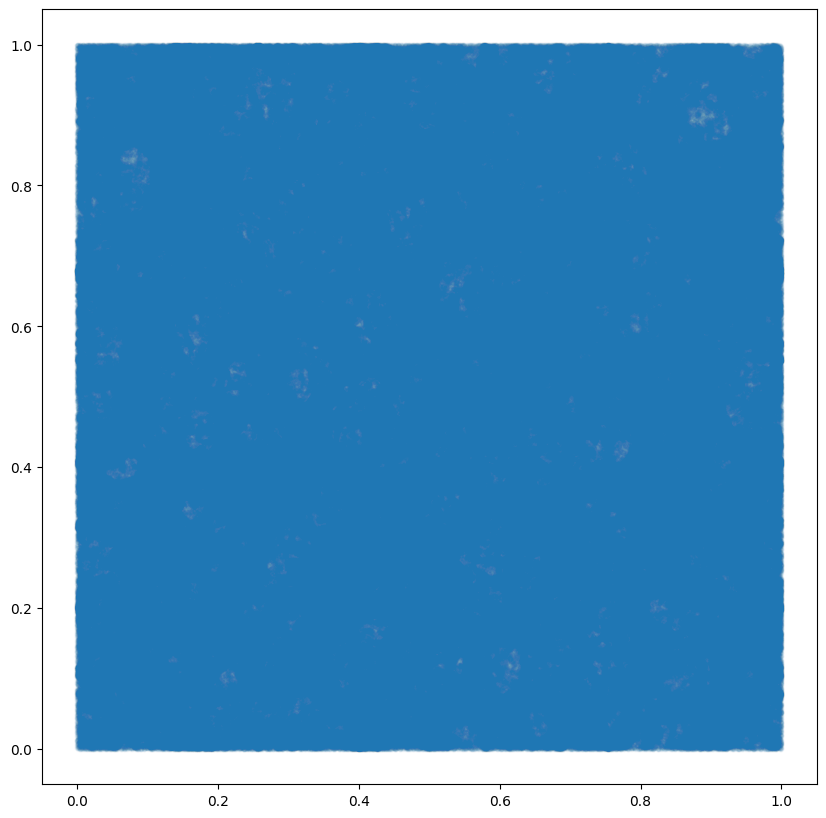

In [42]:
plt.rcParams['agg.path.chunksize'] = 500
plt.scatter(p[:,1],p[:,2],marker='.', alpha=0.03) 
ax = plt.gca()
ax.set_aspect('equal', 'box')

In [43]:
ds, pl = displacement_field_and_initial_coordinates(p, box=[0,1])
dsl = np.linalg.norm(ds, axis=1)


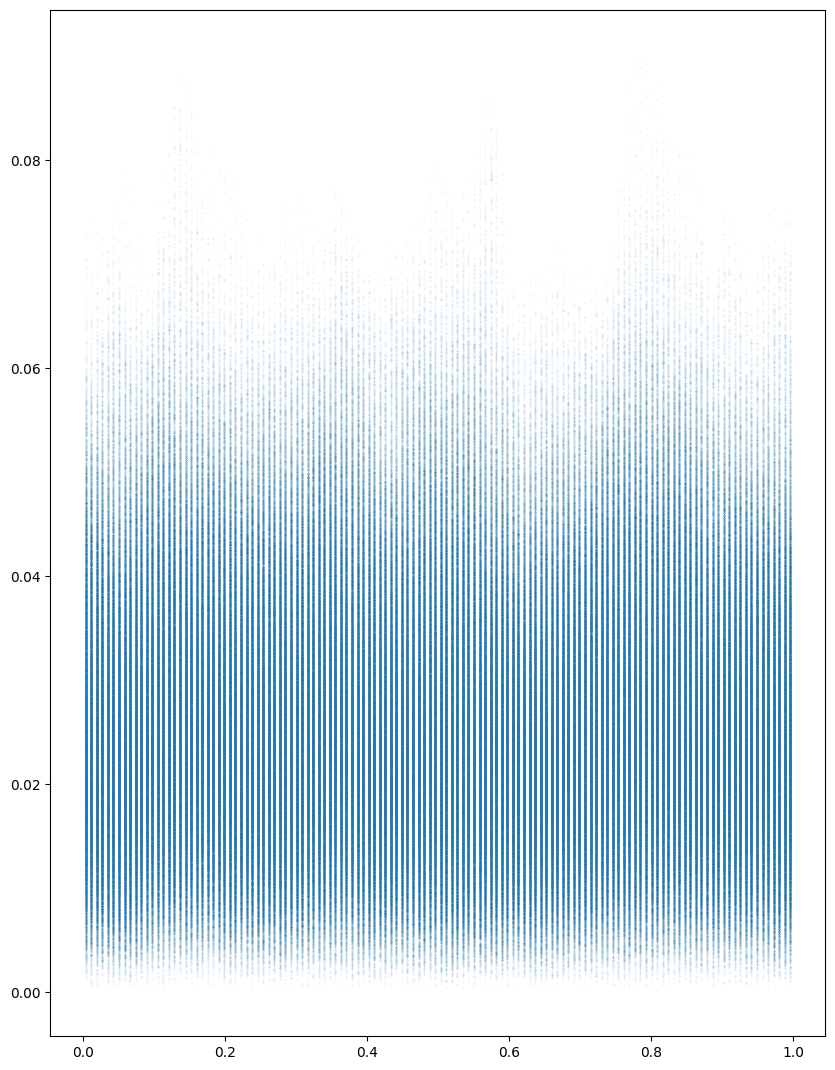

In [44]:
plt.plot(pl[:,0],dsl,'.',markersize=.2,alpha=.3)


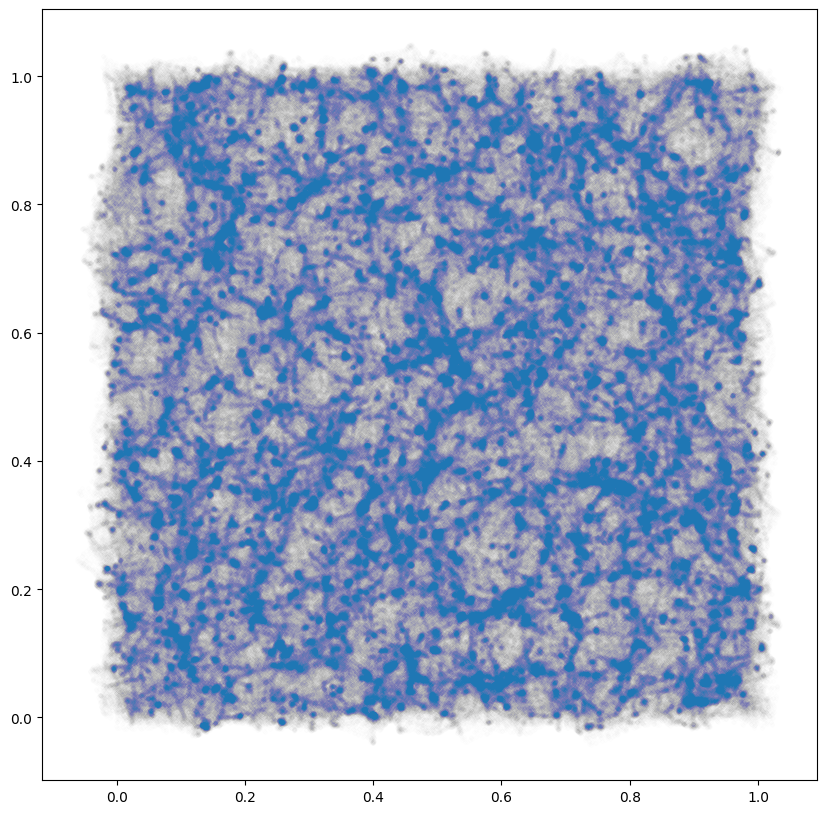

In [47]:
plt.scatter((pl+ds)[:,1],(pl+ds)[:,2],marker='.', alpha=0.003) 
ax = plt.gca()
ax.set_aspect('equal', 'box')